In [131]:
# Imports
import os
import xarray as xr
from affine import Affine
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
# from matplotlib_scalebar.scalebar import ScaleBar
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import pandas as pd
import georasters as gr
import cmocean

In [2]:
# Read the data
da = xr.open_rasterio('../Week 6/Elevation.tif')
transform = Affine.from_gdal(*da.attrs['transform'])

# Define the projection
crs=ccrs.PlateCarree()

In [3]:
data=da.variable.data[0]
data = data.astype('float')

data[data == 32767] = np.nan
y=da.y
x=da.x
# Define extents
lat_min = min(da.y)
lat_max = max(da.y)
lon_min = min(da.x)
lon_max = max(da.x)

In [16]:
x.values.shape, y.values.shape

((2521,), (1758,))

<ipython-input-140-103e427ad2b3>:17: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(im, extend="both")


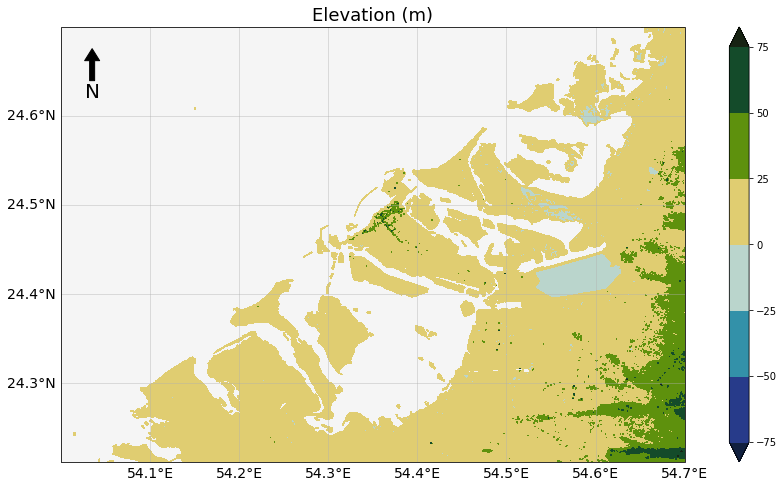

In [140]:
# Plot!
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=crs)
im = ax.contourf(x, y, data, cmap=cmocean.cm.delta, extend='both', linestyles="solid")
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.set_facecolor('#f5f5f5')
fontprops = fm.FontProperties(size=18)

# Grid and Labels
gl = ax.gridlines(crs=crs, draw_labels=True, alpha=0.5)
gl.top_labels = None
gl.right_labels = None
xgrid = np.arange(lon_min-0.5, lon_max+.5, 1.)
ygrid = np.arange(lat_min, lat_max+1, 1.)
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}
fig.colorbar(im, extend="both")

#Add North arrow
x1, y1, arrow_length = 0.05, 0.95, 0.1
ax.annotate('N', xy=(x1, y1), xytext=(x1, y1-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
# Add title and axis names
plt.title('Elevation (m)', fontproperties=fontprops)


# scalebar = AnchoredSizeBar(ax.transData,
#                            20, '20 m', 'lower center', 
#                            pad=0.1,
#                            color='white',
#                            frameon=False,
#                            size_vertical=1,
#                            fontproperties=fontprops)

# ax.add_artist(scalebar)
#scalebar = ScaleBar(1, "m", length_fraction=0.25,box_color=None,box_alpha=0, location='lower left')
#ax.add_artist(scalebar)
plt.show()

In [5]:
data.shape

(1758, 2521)

In [43]:
vlm = np.genfromtxt('new_vlm.csv', delimiter=',')
vlm_df = pd.read_excel('../Week 5/data.xls')

In [76]:
elevation_file = gr.from_file('../Week 6/Elevation.tif')
elevation_df = elevation_file.to_geopandas()

In [46]:
vlm_df.head()

,Station,Longitude,Latitude,VLM,VLM_std
0,NYWV,54.684594,24.796595,-0.207,0.223
1,NYWT,54.115618,24.303783,1.413,0.158
2,NYSM,53.848164,24.056855,-0.856,0.154
3,NYRH,53.141386,24.147625,-0.724,0.166
4,NYRB,52.587928,24.171598,1.812,0.274


[]

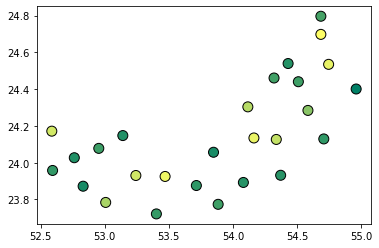

In [52]:
plt.scatter(vlm_df.Longitude, vlm_df.Latitude, c=vlm_df.VLM, cmap='summer', edgecolors='black', s=100)
plt.plot()

In [78]:
min_x, max_x = min(elevation_df.x), max(elevation_df.x)
min_y, max_y = min(elevation_df.y), max(elevation_df.y)

In [138]:
min_x, max_x, min_y, max_y

(54.01375024, 54.699861406000004, 24.212083111400002, 24.700138706)

In [86]:
vlm_points = vlm_df[(vlm_df['Longitude'] >= min_x) & (vlm_df['Longitude'] <= max_x)
          & (vlm_df['Latitude'] >= min_y) & (vlm_df['Latitude'] <= max_y)]

In [93]:
vlm_points.reset_index(inplace=True)
vlm_points.drop(columns=['index'], axis=1, inplace=True)

/Users/ngochoang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<ipython-input-129-0b6a4d1ba4d3>:26: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(im, extend="both")


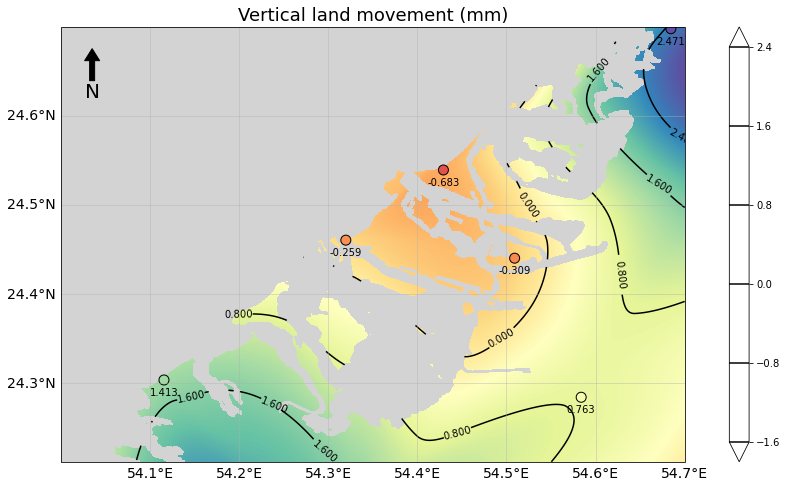

In [129]:
# Plot!
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=crs)

im = ax.contour(x, y, vlm, colors='black', extend='both', linestyles='solid')
ax.clabel(im, inline=True, fontsize=10)

ax.imshow(vlm, extent=[min(x), max(x), min(y), max(y)], cmap=plt.cm.Spectral)

ax.scatter(vlm_df.Longitude, vlm_df.Latitude, c=vlm_df.VLM, cmap=plt.cm.Spectral, edgecolors='black', s=100)
for i, txt in enumerate(vlm_points.VLM):
    ax.annotate(txt, (vlm_points.Longitude[i], vlm_points.Latitude[i]-0.02), ha='center', va='bottom')

ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.set_facecolor('#d3d3d3')
fontprops = fm.FontProperties(size=18)

# Grid and Labels
gl = ax.gridlines(crs=crs, draw_labels=True, alpha=0.5)
gl.top_labels = None
gl.right_labels = None
xgrid = np.arange(lon_min-0.5, lon_max+.5, 1.)
ygrid = np.arange(lat_min, lat_max+1, 1.)
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}
fig.colorbar(im, extend="both")

#Add North arrow
x1, y1, arrow_length = 0.05, 0.95, 0.1
ax.annotate('N', xy=(x1, y1), xytext=(x1, y1-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
# Add title and axis names
plt.title('Vertical land movement (mm)', fontproperties=fontprops)

plt.show()

<ipython-input-130-29069a1625f8>:26: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(im, extend="both")


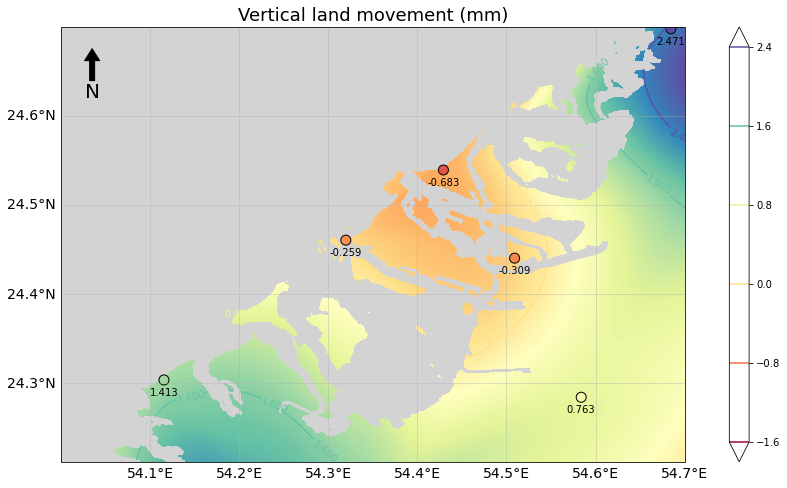

In [130]:
# Plot!
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=crs)

im = ax.contour(x, y, vlm, cmap=plt.cm.Spectral, extend='both', linestyles='solid')
ax.clabel(im, inline=True, fontsize=10)

ax.imshow(vlm, extent=[min(x), max(x), min(y), max(y)], cmap=plt.cm.Spectral)

ax.scatter(vlm_df.Longitude, vlm_df.Latitude, c=vlm_df.VLM, cmap=plt.cm.Spectral, edgecolors='black', s=100)
for i, txt in enumerate(vlm_points.VLM):
    ax.annotate(txt, (vlm_points.Longitude[i], vlm_points.Latitude[i]-0.02), ha='center', va='bottom')

ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.set_facecolor('#d3d3d3')
fontprops = fm.FontProperties(size=18)

# Grid and Labels
gl = ax.gridlines(crs=crs, draw_labels=True, alpha=0.5)
gl.top_labels = None
gl.right_labels = None
xgrid = np.arange(lon_min-0.5, lon_max+.5, 1.)
ygrid = np.arange(lat_min, lat_max+1, 1.)
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}
fig.colorbar(im, extend="both")

#Add North arrow
x1, y1, arrow_length = 0.05, 0.95, 0.1
ax.annotate('N', xy=(x1, y1), xytext=(x1, y1-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
# Add title and axis names
plt.title('Vertical land movement (mm)', fontproperties=fontprops)

plt.show()